In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


### Load data

#### Description

This section takes a brief look at the dataset and its primarily numeric features.

In [18]:
# df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
df = pd.read_csv('data/train.csv')

df.drop(columns=['Id'], inplace=True)

print(df.shape)
display(df.head())
display(df.info())

(617, 57)


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

None

#### Drop Sparse Data with large amount of missing/identical data (>95%)

In [19]:
df = df.drop(columns=["BC", "BR", "BZ", "CL", "DF", "EU", "FR"], axis=0)

#### Train test split

In [20]:
from sklearn.model_selection import train_test_split

target = df["Class"]
features = df.drop(columns=["Class"], axis=0)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=400)

#### Graphing Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

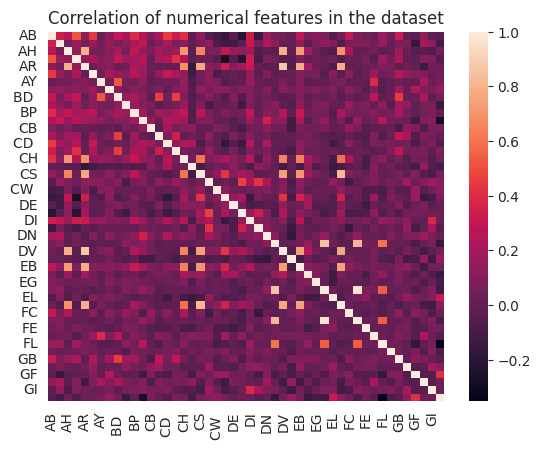

In [21]:
import seaborn as sns

categorical_features = ['EJ']
numerical_features = [col for col in X_train.columns if col != 'EJ']

correlation_matrix = X_train.corr(numeric_only=True)
plt.title("Correlation of numerical features in the dataset")

sns.heatmap(correlation_matrix)
plt.show

### Preprocessing

#### Description

In this section, we seperate the target from the rest of the dataset, and separate the one categorical feature out from the rest of them. For the numerical data, we apply a standard scaler, and for the categorical feature we apply a one hot encoder.
For all features we apply a simple imputer because there are some missing values.

Then, we take a look at how the data will look after the preprocessor handles it.

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline


preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), numerical_features),
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder()), categorical_features)
)

transformed_data = preprocessor.fit_transform(X_train)

#### Data
This is the data after it has been preprocessed. All data has been scalled and standerized. We ended with 56 features in the data set

In [23]:
pd.DataFrame(transformed_data).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,3.911109,1.534034,5.177969,-0.237762,-0.187022,0.050053,-0.083758,1.593654,-0.519902,2.055789,...,-0.444274,-0.255334,0.509165,-0.415346,0.759217,1.467077,-0.649531,1.326229,1.0,0.0
1,0.161014,-0.100767,-0.256864,0.624312,-0.187022,3.678300,-0.083758,0.334425,-0.138764,-0.083308,...,-0.444274,-0.166103,-0.011571,1.728277,-0.072023,-1.256207,0.569701,1.326229,1.0,0.0
2,-0.281214,0.256208,-0.256864,0.061283,-0.187022,-0.470688,-0.083758,-1.683304,0.095534,-0.190262,...,1.185821,-0.250637,2.103347,-0.348151,-0.626478,0.365308,-0.467003,-0.810243,0.0,1.0
3,0.037190,0.527196,-0.126486,-0.305740,-0.187022,2.742661,-0.083758,0.929966,0.757953,-0.511127,...,-0.182101,0.101588,0.120440,1.039248,-0.743835,0.835230,0.595355,-0.802313,0.0,1.0
4,0.028346,-0.098854,-0.256864,-0.356745,-0.187022,-0.690838,-0.062827,-0.632959,-0.527791,1.521015,...,-0.045904,-0.076873,-1.199213,-0.415346,-0.683121,-0.581331,-1.184433,-0.802091,0.0,1.0


### Create the models

#### Description
In this section, we create the pipelines for the models and directly put in the hyperparameters. We've done grid search for each of these models individually and discovered optimal hyperparameters beforehand.

In [24]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import (
    cross_validate
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipelines = {
    "logistic_regression": make_pipeline(preprocessor, LogisticRegression()),
    "logistic_regression_pca": make_pipeline(preprocessor, PCA(n_components=37), LogisticRegression()),
    "SVC": make_pipeline(preprocessor, SVC(kernel='rbf', C=1.0, gamma='scale')),
    "random_forest": make_pipeline(preprocessor, RandomForestClassifier(n_estimators=50, )),
    "hist_gradient_boosting": make_pipeline(preprocessor,
                                            HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100,
                                                                           max_leaf_nodes=31)),
    "gaussian_process": make_pipeline(preprocessor, GaussianProcessClassifier()),
    "guassian_process_pca": make_pipeline(preprocessor, PCA(n_components=37), GaussianProcessClassifier()),
    "k_neighbors": make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=5)),
    "k_neighbors_pca": make_pipeline(preprocessor, PCA(n_components=7), KNeighborsClassifier(n_neighbors=5)),
    "k_neighbors_lda": make_pipeline(preprocessor, LinearDiscriminantAnalysis(), KNeighborsClassifier(n_neighbors=5))
}

### Cross Validation
 
#### Description
We use sklearn's cross validation function to easily discern performance metrics for each of the pipelines we just created. This allows us to get a good idea of which model we should submit to do the final predictions.

We used Accuracy Precision recall and f1 scores to measure the models.

In [27]:
cv_scores = {}
for name, pipe in pipelines.items():
    scores = cross_validate(pipe, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1'])
    cv_scores[name] = {}
    cv_scores[name]['accuracy'] = scores["test_accuracy"].mean()
    cv_scores[name]['precision'] = scores["test_precision"].mean()
    cv_scores[name]['recall'] = scores["test_recall"].mean()
    cv_scores[name]['f1'] = scores["test_f1"].mean()

display(pd.DataFrame(cv_scores))

,logistic_regression,logistic_regression_pca,SVC,random_forest,hist_gradient_boosting,gaussian_process,guassian_process_pca,k_neighbors,k_neighbors_pca,k_neighbors_lda
accuracy,0.878273,0.878293,0.870212,0.894475,0.920944,0.853803,0.853845,0.866089,0.876294,0.866028
precision,0.698697,0.714127,0.901984,0.870303,0.880395,0.673485,0.671970,0.818333,0.828571,0.642073
recall,0.580392,0.547059,0.319608,0.488235,0.649020,0.384967,0.385621,0.317647,0.422222,0.613072
f1,0.629387,0.610309,0.459484,0.622019,0.742824,0.486236,0.486236,0.454823,0.533386,0.623167


### Visualization

#### Description

We put the aforementioned cross-validation results onto a bar graph so interpreting the data is even faster and easier.

#### Accuracy Comparison

(0.8, 1.0)

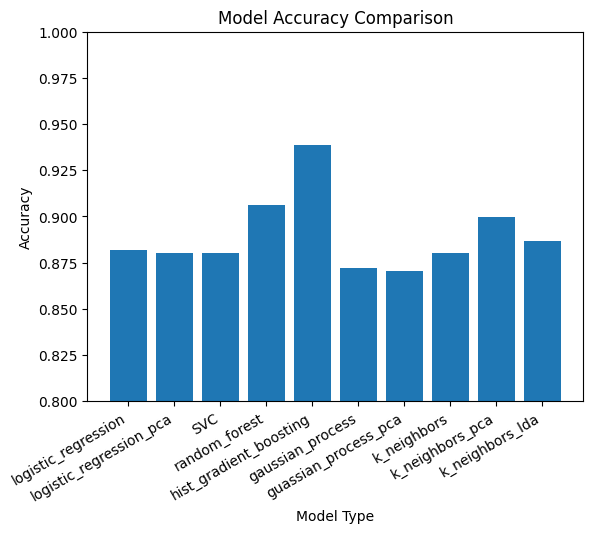

In [14]:
plt.bar(cv_scores.keys(), [cv_scores[model]['accuracy'] for model in cv_scores.keys()])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model Type')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)

#### F1 Comparison

(0.4, 1.0)

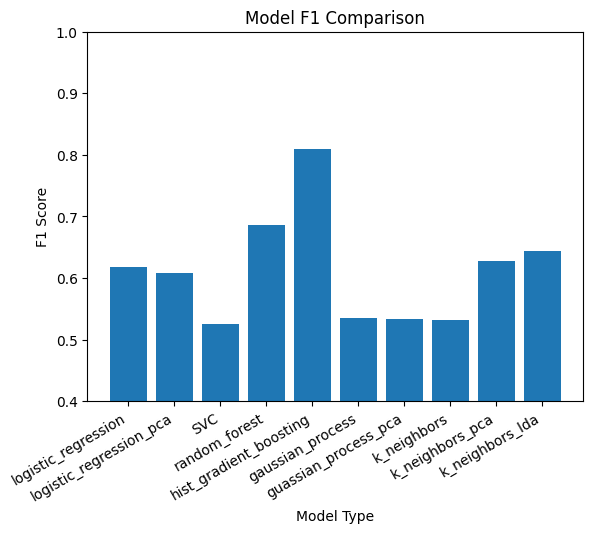

In [15]:
plt.bar(cv_scores.keys(), [cv_scores[model]['f1'] for model in cv_scores.keys()])
plt.title('Model F1 Comparison')
plt.xlabel('Model Type')
plt.xticks(rotation=30, ha='right')
plt.ylabel('F1 Score')
plt.ylim(0.4, 1)

### Export the predictions for the best performing model

#### Description
Because the gradient boosting model achieved the highest scores in cross validation, this is the model we will use for the final submission.

In [16]:
test_df = pd.read_csv('data/test.csv')
#test_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')

# Prepare test features
test_x = test_df.drop(columns=['Id'])

pipelines["hist_gradient_boosting"].fit(data, target)
prediction = pipelines["hist_gradient_boosting"].predict_proba(test_x)
submission = pd.DataFrame(prediction)
submission['Id'] = test_df['Id'].values
submission.rename(columns={0: "class_0", 1: "class_1"}, inplace=True)

submission.to_csv('submission.csv', index=False)